In [2]:
!git clone https://github.com/Ayxux/NLP_Minor_Project


Cloning into 'NLP_Minor_Project'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 136 (delta 48), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (136/136), 1.23 MiB | 3.39 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [3]:
%cd /content/NLP_Minor_Project/

!pip install -r REQUIREMENTS.txt


/content/NLP_Minor_Project
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 4.0 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement wordcloud==1.8.2 (from versions: 1.0.0, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.2, 1.2.1, 1.3, 1.3.1, 1.4, 1.4.1, 1.5.0, 1.6.0, 1.7.0, 1.8.0, 1.8.1, 1.8.2.2, 1.9.1.1, 1.9.2, 1.9.3, 1.9.4)
ERROR: No matching distribution found for wordcloud==1.8.2


In [4]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [5]:
import os
path = "/content/drive/MyDrive/data/extracted_files"
os.listdir(path)


['test.ft.txt.bz2', 'train.ft.txt.bz2']

In [6]:
import numpy as np
import bz2
def get_labels_and_texts(file, limit=50000):
    labels, texts = [], []
    for i, line in enumerate(bz2.BZ2File(file)):
        if i >= limit:
            break
        x = line.decode("utf-8")
        labels.append(1 if int(x[9]) == 2 else 0)
        texts.append(x[10:].strip())
    return np.array(labels, dtype=np.int8), texts  # ✅ np.int8 saves memory

In [7]:
import pandas as pd
import bz2
# Function to load Amazon dataset from .bz2 file (LIMITED SIZE)
def load_bz2_to_dataframe(file_path, num_lines=50000):
    data = []
    with bz2.open(file_path, "rt", encoding="utf-8") as file:
        for i, line in enumerate(file):
            if i >= num_lines:
                break
            label, text = line.split(" ", 1)
            label = label.replace("__label__", "").strip()
            data.append((label, text.strip()))
    return pd.DataFrame(data, columns=["label", "text"])

In [8]:
# Load datasets
train_path = "/content/drive/MyDrive/data/extracted_files/train.ft.txt.bz2"
test_path = "/content/drive/MyDrive/data/extracted_files/test.ft.txt.bz2"
df_train = load_bz2_to_dataframe(train_path, num_lines=50000)
df_test = load_bz2_to_dataframe(test_path, num_lines=10000)

In [9]:
df_train.head()

label                                               text
0     2  Stuning even for the non-gamer: This sound tra...
1     2  The best soundtrack ever to anything.: I'm rea...
2     2  Amazing!: This soundtrack is my favorite music...
3     2  Excellent Soundtrack: I truly like this soundt...
4     2  Remember, Pull Your Jaw Off The Floor After He...

In [10]:

# Convert labels to numeric format
df_train["label"] = df_train["label"].map({"1": 0, "2": 1})  # "1" → Negative (0), "2" → Positive (1)
df_test["label"] = df_test["label"].map({"1": 0, "2": 1})


# Remove NaN values
df_train.dropna(subset=["label"], inplace=True)
df_test.dropna(subset=["label"], inplace=True)

df_train["text"].fillna("", inplace=True)
df_test["text"].fillna("", inplace=True)

if df_train["label"].nunique() < 2:
    raise ValueError("Training data contains only one class! Check dataset.")

<ipython-input-10-7092306539fc>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["text"].fillna("", inplace=True)
<ipython-input-10-7092306539fc>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

Original labels in training data:
label
1    25506
0    24494
Name: count, dtype: int64

Sample of raw labels:
0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

Unique values in labels:
[1 0]

After fix - Training labels:
label
0    50000
Name: count, dtype: int64

After fix - Test labels:
label
0    10000
Name: count, dtype: int64

NaN values in training labels: 0
NaN values in test labels: 0
   label                                               text
0      0  Stuning even for the non-gamer: This sound tra...
1      0  The best soundtrack ever to anything.: I'm rea...
2      0  Amazing!: This soundtrack is my favorite music...
3      0  Excellent Soundtrack: I truly like this soundt...
4      0  Remember, Pull Your Jaw Off The Floor After He...


<ipython-input-11-3b7ccc608676>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["text"].fillna("", inplace=True)
<ipython-input-11-3b7ccc608676>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   50000 non-null  int64 
 1   text    50000 non-null  object
dtypes: int64(1), object(1)
memory usage: 781.4+ KB
None
label    0
text     0
dtype: int64


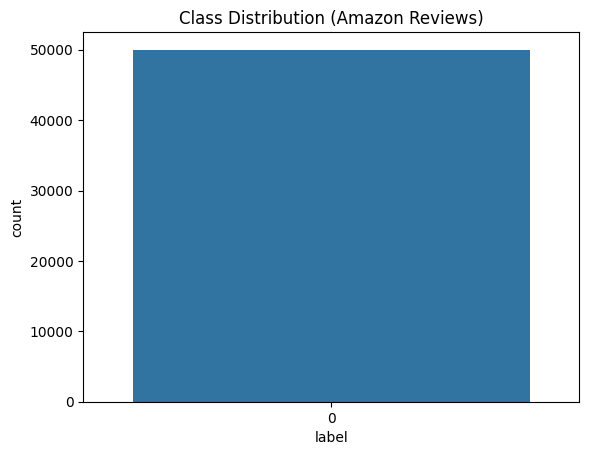

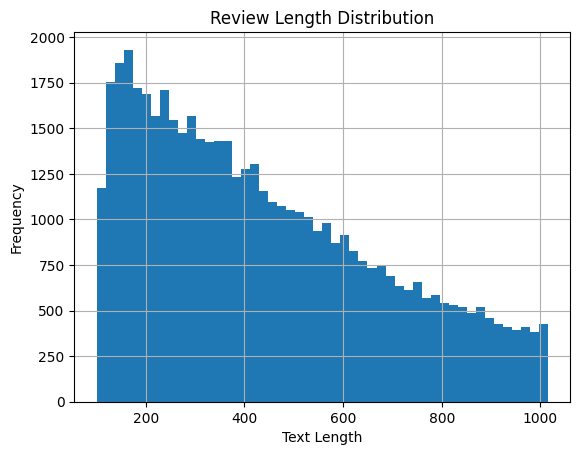

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# ✅ Check original labels
print("Original labels in training data:")
print(df_train["label"].value_counts())

print("\nSample of raw labels:")
print(df_train["label"].head())

# ✅ Check for any unexpected label values
print("\nUnique values in labels:")
print(df_train["label"].unique())

# ✅ Fix label mapping
df_train["label"] = df_train["label"].apply(lambda x: 1 if "positive" in str(x).lower() else 0)
df_test["label"] = df_test["label"].apply(lambda x: 1 if "positive" in str(x).lower() else 0)

# ✅ Verify label distribution after fixing
print("\nAfter fix - Training labels:")
print(df_train["label"].value_counts())
print("\nAfter fix - Test labels:")
print(df_test["label"].value_counts())

# ✅ Handle missing values
df_train["text"].fillna("", inplace=True)
df_test["text"].fillna("", inplace=True)

# ✅ Verify no NaN values
print("\nNaN values in training labels:", df_train["label"].isna().sum())
print("NaN values in test labels:", df_test["label"].isna().sum())

# ✅ Display dataset information
print(df_train.head())
print(df_train.info())
print(df_train.isnull().sum())

# ✅ Check class distribution
sns.countplot(x=df_train["label"])
plt.title("Class Distribution (Amazon Reviews)")
plt.show()

# ✅ Text Length Distribution
df_train["text_length"] = df_train["text"].astype(str).apply(len)
df_train["text_length"].hist(bins=50)
plt.title("Review Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [12]:
import spacy
nlp = spacy.load("en_core_web_sm")
def preprocess_texts(texts):
    processed_texts = []
    for doc in nlp.pipe(texts, disable=["ner", "parser"]):  # ✅ Disables unnecessary components (saves RAM)
        tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
        processed_texts.append(" ".join(tokens))
    return processed_texts


In [13]:
train_labels, train_texts = get_labels_and_texts('/content/drive/MyDrive/data/extracted_files/train.ft.txt.bz2', limit=50000)
test_labels, test_texts = get_labels_and_texts('/content/drive/MyDrive/data/extracted_files/test.ft.txt.bz2', limit=10000)

In [14]:
train_texts = preprocess_texts(train_texts)
test_texts = preprocess_texts(test_texts)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, dtype=np.float32)  # ✅ max_features to save RAM
X = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

In [16]:



from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(
    X, train_labels, train_size = 0.75
)

      # Train and evaluate Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
lr_accuracy = accuracy_score(y_val, y_pred_lr)
lr_precision = precision_score(y_val, y_pred_lr)
lr_recall = recall_score(y_val, y_pred_lr)
lr_f1 = f1_score(y_val, y_pred_lr)

print(f"Logistic Regression - Accuracy: {lr_accuracy:.4f}")
print(f"Logistic Regression - Precision: {lr_precision:.4f}")
print(f"Logistic Regression - Recall: {lr_recall:.4f}")
print(f"Logistic Regression - F1-Score: {lr_f1:.4f}")




Logistic Regression - Accuracy: 0.8707
Logistic Regression - Precision: 0.8663
Logistic Regression - Recall: 0.8826
Logistic Regression - F1-Score: 0.8744


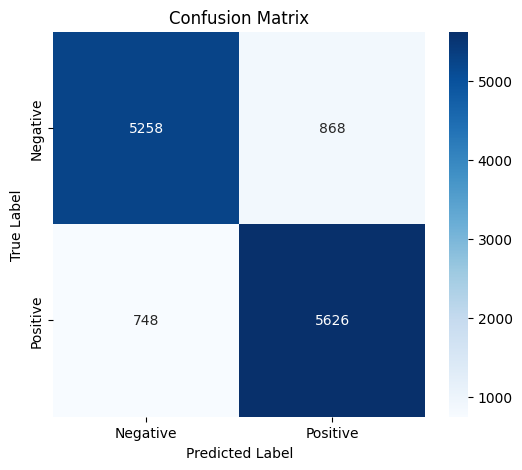

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_val, lr.predict(X_val))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Naive Bayes - Accuracy: 0.8368
Naive Bayes - Precision: 0.8345
Naive Bayes - Recall: 0.8481
Naive Bayes - F1-Score: 0.8413


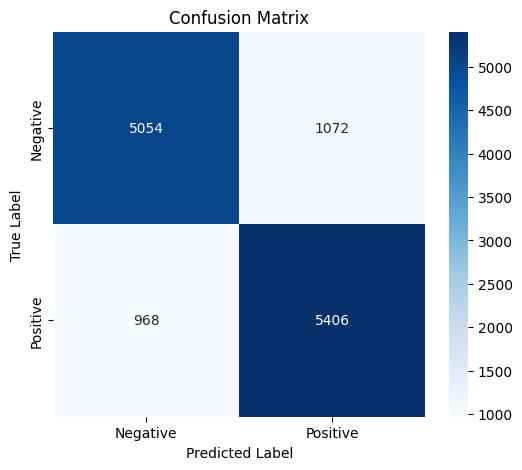

In [18]:

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_val)
nb_accuracy = accuracy_score(y_val, y_pred_nb)
nb_precision = precision_score(y_val, y_pred_nb)
nb_recall = recall_score(y_val, y_pred_nb)
nb_f1 = f1_score(y_val, y_pred_nb)

print(f"Naive Bayes - Accuracy: {nb_accuracy:.4f}")
print(f"Naive Bayes - Precision: {nb_precision:.4f}")
print(f"Naive Bayes - Recall: {nb_recall:.4f}")
print(f"Naive Bayes - F1-Score: {nb_f1:.4f}")



# Confusion matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_val, y_pred_nb)  # Use y_pred_nb instead of y_pred
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


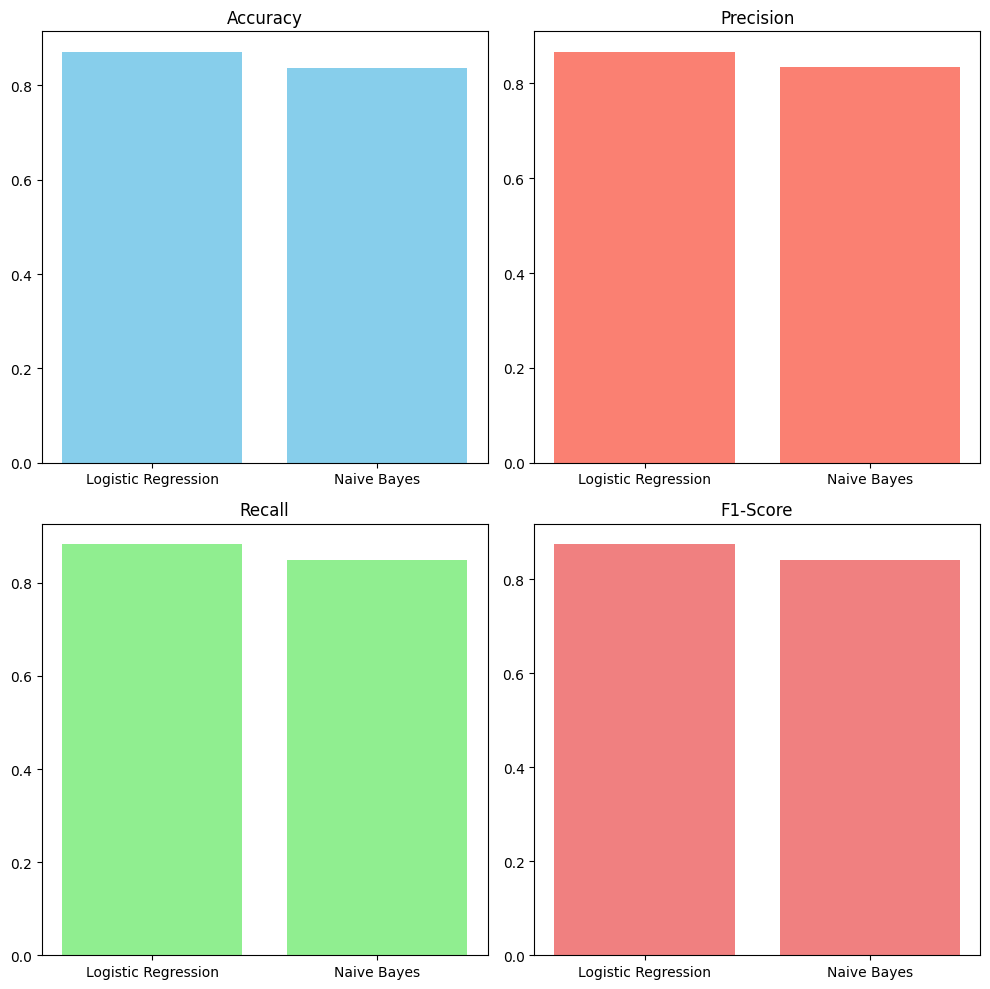

In [19]:
# Model Comparison between Logistic Regression and Naive Bayes
models = ['Logistic Regression', 'Naive Bayes']
accuracy_scores = [lr_accuracy, nb_accuracy]
precision_scores = [lr_precision, nb_precision]
recall_scores = [lr_recall, nb_recall]
f1_scores = [lr_f1, nb_f1]

# Plot comparison
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Accuracy
axes[0, 0].bar(models, accuracy_scores, color='skyblue')
axes[0, 0].set_title("Accuracy")

# Precision
axes[0, 1].bar(models, precision_scores, color='salmon')
axes[0, 1].set_title("Precision")

# Recall
axes[1, 0].bar(models, recall_scores, color='lightgreen')
axes[1, 0].set_title("Recall")

# F1-Score
axes[1, 1].bar(models, f1_scores, color='lightcoral')
axes[1, 1].set_title("F1-Score")

plt.tight_layout()
plt.show()

In [20]:
!pip install transformers datasets torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [21]:
!pip install datasets


In [22]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

Topic #1: movie good like love great watch story bad time see
Topic #2: order amazon buy version purchase receive edition item product coffee
Topic #3: work find life need good learn great help look know
Topic #4: cd album song music good like great sound listen hear
Topic #5: love try get like day baby buy time month go
Topic #6: money buy waste time not go get review well horrible
Topic #7: work great good product use price buy quality look problem
Topic #8: film original effect war video actor american version performance bad
Topic #9: old play game fun year love child son kid toy
Topic #10: book read story write good author like novel page think
Performing t-SNE dimensionality reduction...


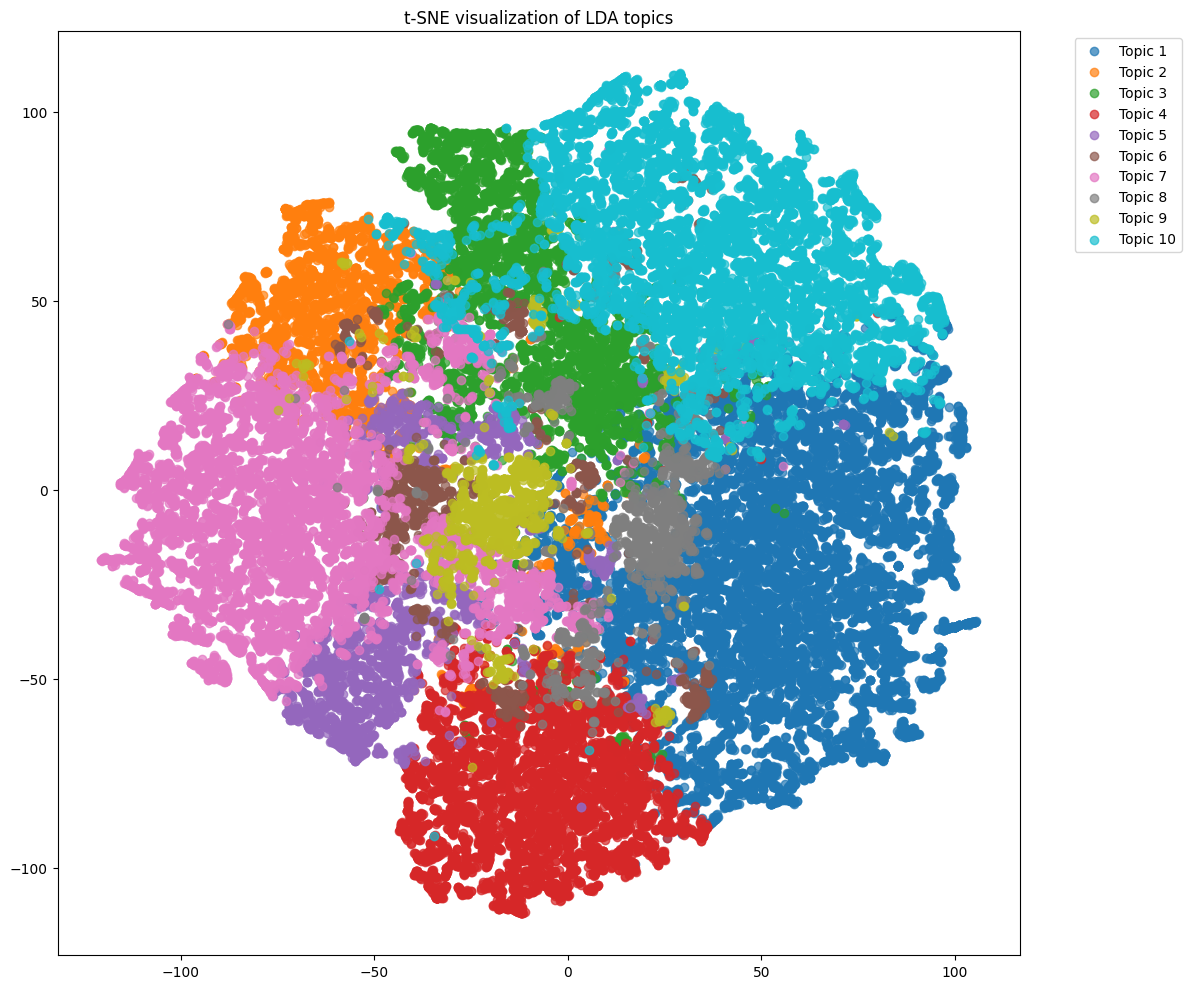

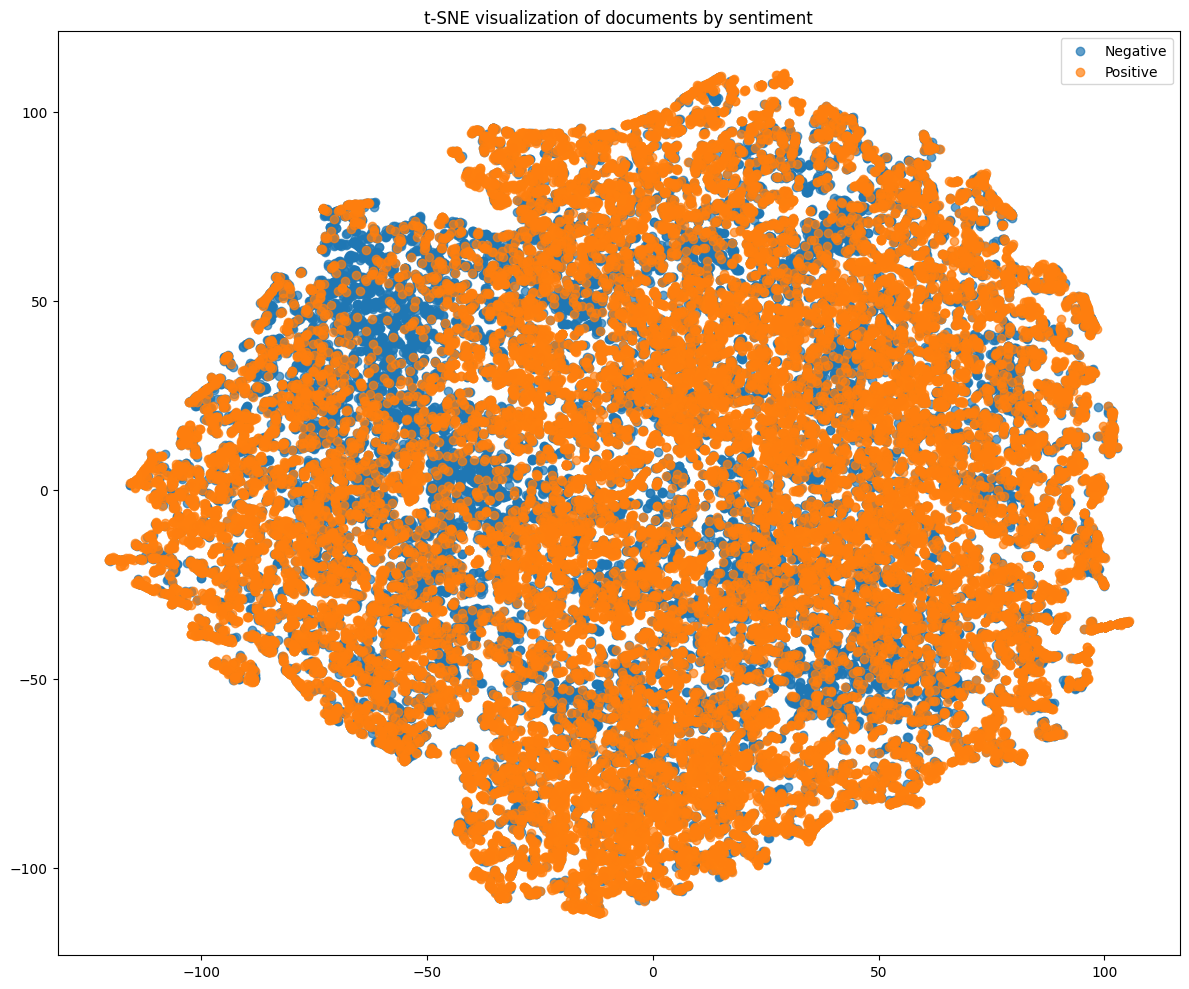

In [23]:
# Import necessary libraries for LDA and visualization
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Use CountVectorizer instead of TfidfVectorizer for LDA (LDA works better with raw counts)
from sklearn.feature_extraction.text import CountVectorizer

# Create document-term matrix using CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000, dtype=np.float32)
X_count = count_vectorizer.fit_transform(train_texts)

# Train LDA model
n_topics = 10  # You can adjust this number based on your needs
lda_model = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=10,
    learning_method='online',
    random_state=42,
    batch_size=128,
    n_jobs=-1  # Use all available cores
)

# Fit the LDA model to the document-term matrix
lda_model.fit(X_count)

# Get document-topic distribution
doc_topic_dist = lda_model.transform(X_count)

# Display top words for each topic
def display_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic #{topic_idx + 1}: {' '.join(topic_words)}")

feature_names = count_vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names)

# t-SNE Visualization
print("Performing t-SNE dimensionality reduction...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(doc_topic_dist)

# Create a DataFrame for visualization
tsne_df = pd.DataFrame(tsne_results, columns=['x', 'y'])
tsne_df['dominant_topic'] = np.argmax(doc_topic_dist, axis=1)
tsne_df['label'] = train_labels  # Adding the sentiment labels

# Plot t-SNE results colored by dominant topic
plt.figure(figsize=(12, 10))
for topic in range(n_topics):
    subset = tsne_df[tsne_df['dominant_topic'] == topic]
    plt.scatter(subset['x'], subset['y'], label=f'Topic {topic+1}', alpha=0.7)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('t-SNE visualization of LDA topics')
plt.tight_layout()
plt.show()

# Alternative: Plot t-SNE results colored by sentiment label
plt.figure(figsize=(12, 10))
for label in np.unique(tsne_df['label']):
    subset = tsne_df[tsne_df['label'] == label]
    plt.scatter(
        subset['x'],
        subset['y'],
        label=f'{"Positive" if label == 1 else "Negative"}',
        alpha=0.7
    )

plt.legend()
plt.title('t-SNE visualization of documents by sentiment')
plt.tight_layout()
plt.show()

Performing UMAP dimensionality reduction...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


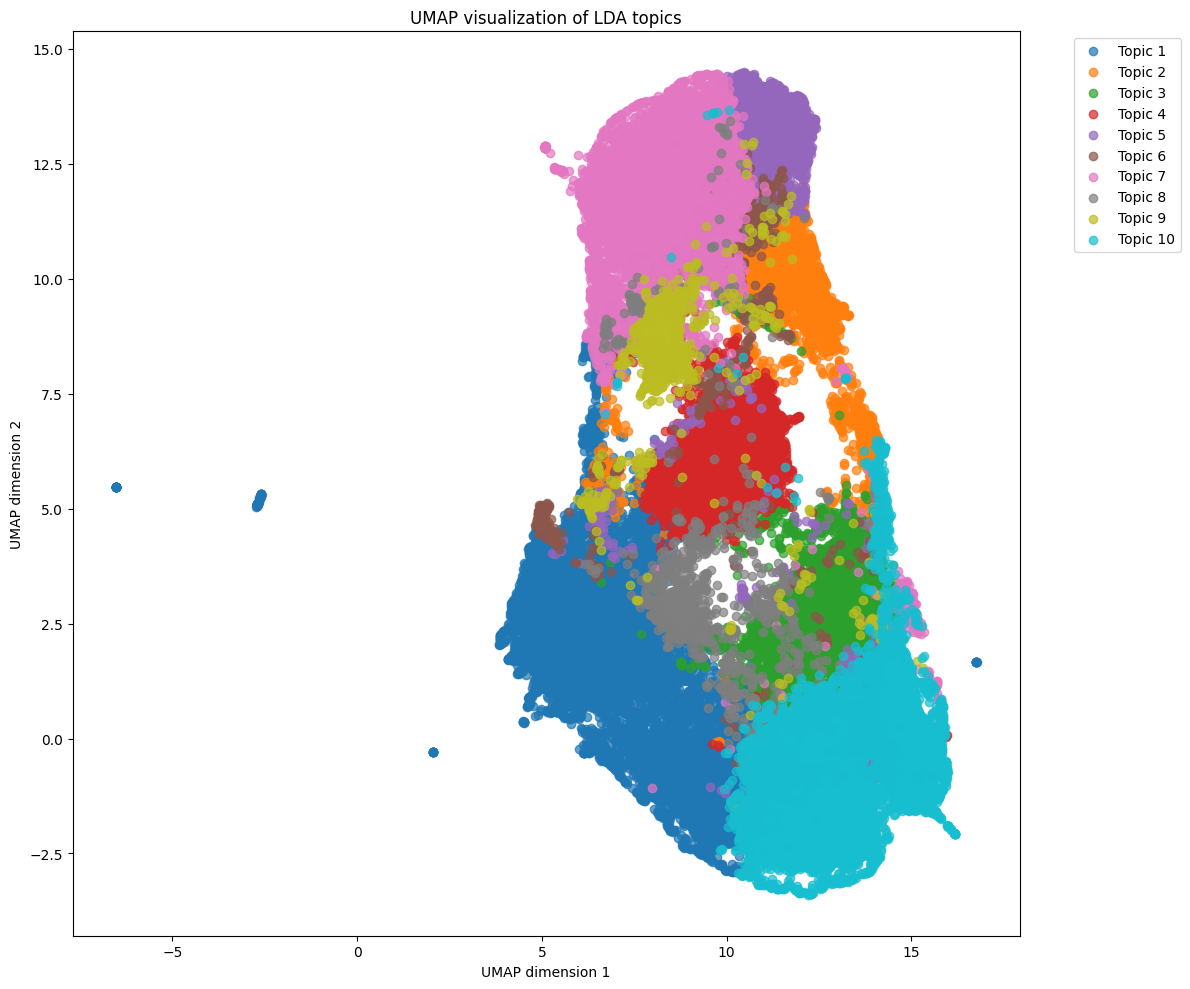

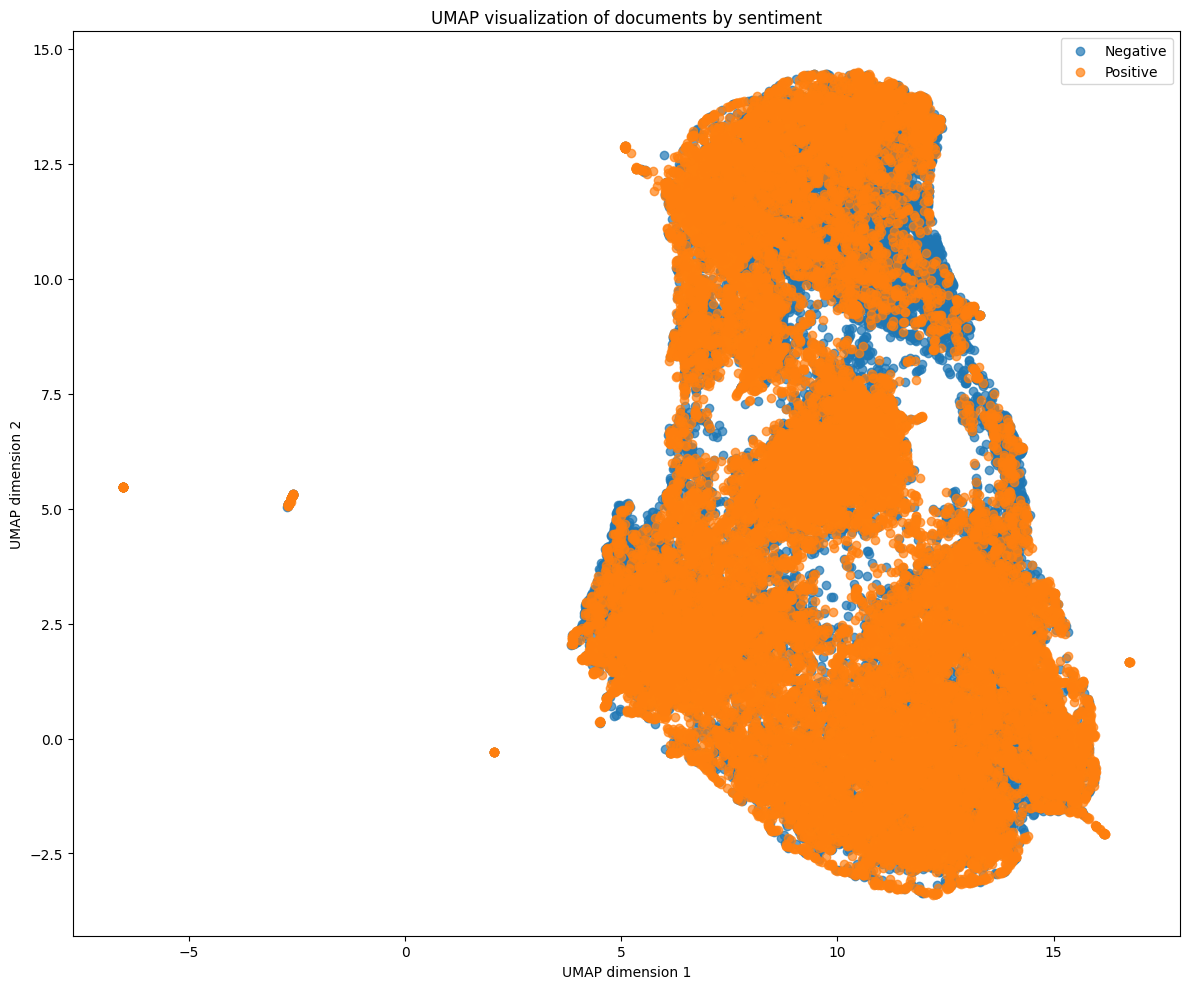

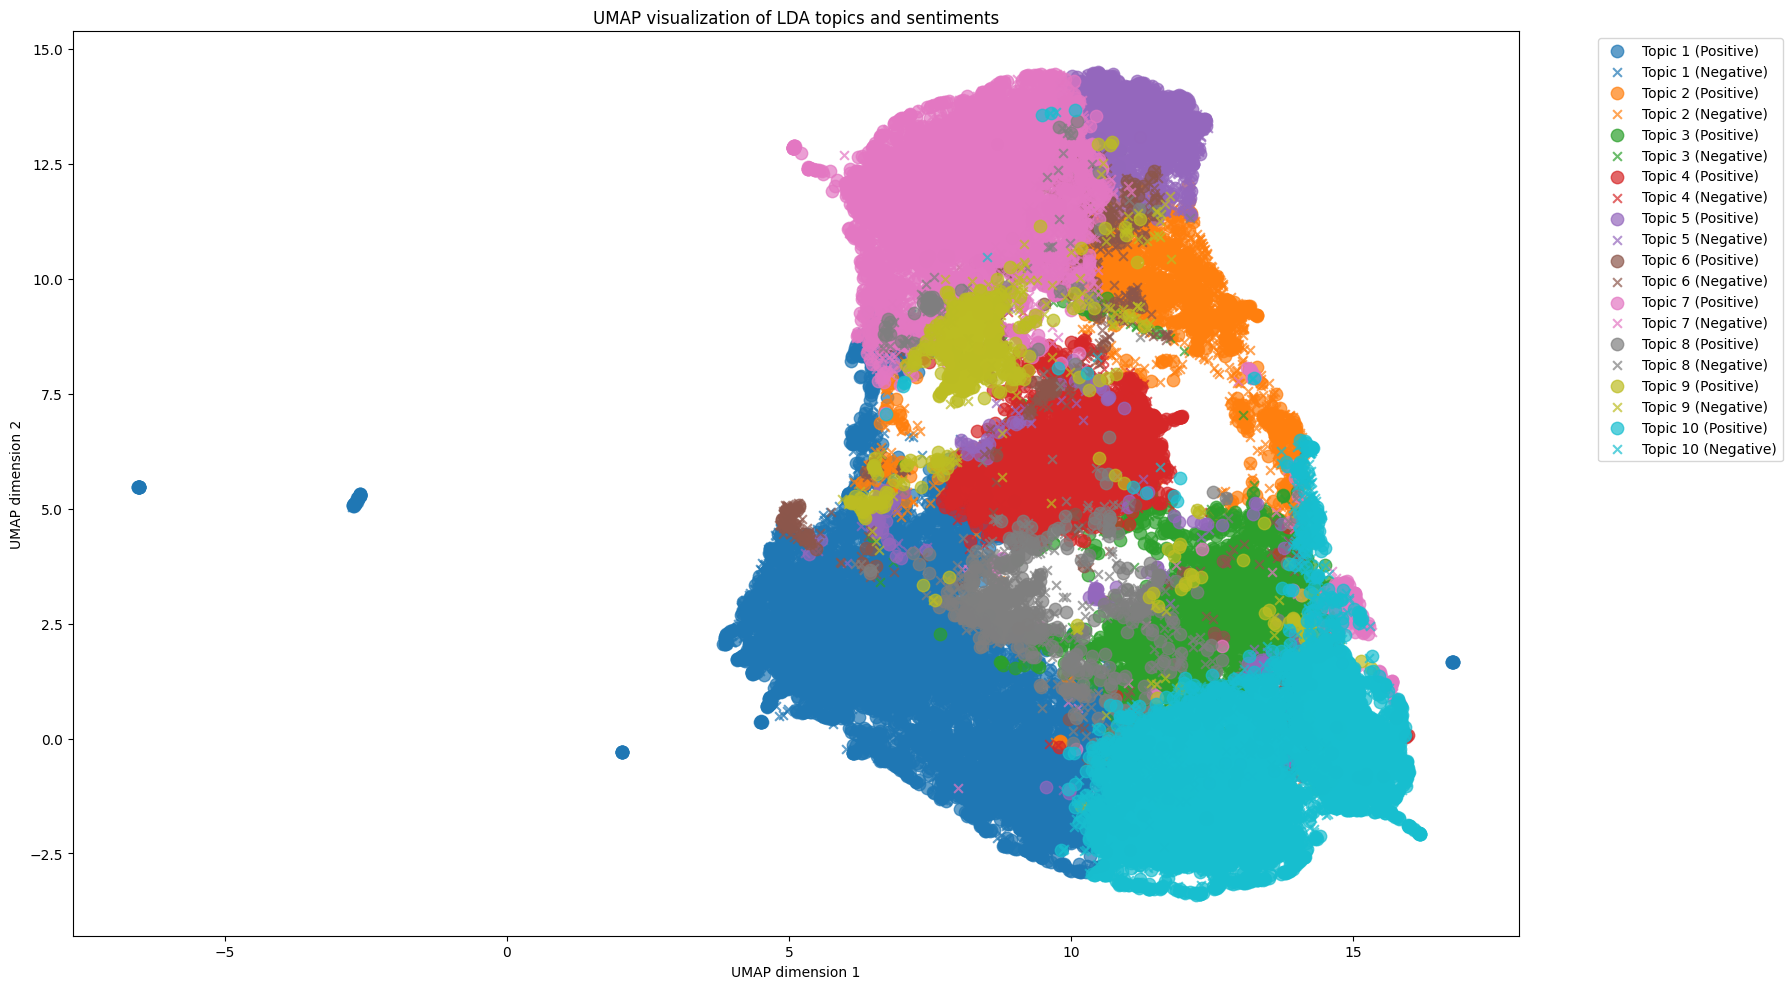

In [24]:
# UMAP Visualization for LDA topics
# First, install UMAP if not already installed
!pip install umap-learn

import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Using the doc_topic_dist from your LDA model
print("Performing UMAP dimensionality reduction...")
umap_model = umap.UMAP(
    n_components=2,
    random_state=42,
    n_neighbors=15,    # Controls local versus global structure preservation
    min_dist=0.1,      # Controls compactness of the clusters
    metric='cosine'    # Often works well with text data
)
umap_results = umap_model.fit_transform(doc_topic_dist)

# Create a DataFrame for visualization
umap_df = pd.DataFrame(umap_results, columns=['x', 'y'])
umap_df['dominant_topic'] = np.argmax(doc_topic_dist, axis=1)
umap_df['label'] = train_labels

# Plot UMAP results colored by dominant topic
plt.figure(figsize=(12, 10))
for topic in range(n_topics):
    subset = umap_df[umap_df['dominant_topic'] == topic]
    plt.scatter(subset['x'], subset['y'], label=f'Topic {topic+1}', alpha=0.7)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('UMAP visualization of LDA topics')
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')
plt.tight_layout()
plt.show()

# Plot UMAP results colored by sentiment label
plt.figure(figsize=(12, 10))
for label in np.unique(umap_df['label']):
    subset = umap_df[umap_df['label'] == label]
    plt.scatter(
        subset['x'],
        subset['y'],
        label=f'{"Positive" if label == 1 else "Negative"}',
        alpha=0.7
    )

plt.legend()
plt.title('UMAP visualization of documents by sentiment')
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')
plt.tight_layout()
plt.show()

# Optional: Create a joint visualization with both topic and sentiment
plt.figure(figsize=(18, 10))

# Create a color map for topics
topic_colors = plt.cm.tab10(np.linspace(0, 1, n_topics))

# Plot documents colored by dominant topic with point size reflecting sentiment
for topic in range(n_topics):
    # Get documents for this topic
    topic_docs = umap_df[umap_df['dominant_topic'] == topic]

    # Plot positive sentiment documents with larger markers
    pos_docs = topic_docs[topic_docs['label'] == 1]
    plt.scatter(
        pos_docs['x'],
        pos_docs['y'],
        color=topic_colors[topic],
        marker='o',
        s=80,
        alpha=0.7,
        label=f'Topic {topic+1} (Positive)' if len(pos_docs) > 0 else None
    )

    # Plot negative sentiment documents with smaller markers
    neg_docs = topic_docs[topic_docs['label'] == 0]
    plt.scatter(
        neg_docs['x'],
        neg_docs['y'],
        color=topic_colors[topic],
        marker='x',
        s=40,
        alpha=0.7,
        label=f'Topic {topic+1} (Negative)' if len(neg_docs) > 0 else None
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('UMAP visualization of LDA topics and sentiments')
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')
plt.tight_layout()
plt.show()

In [26]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=aa1387928cd141ff894d1e2063fc59cc4950d3309881d458cbc012d4b7c9427f
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


Explaining a POSITIVE review:
Document: stun non gamer sound track beautiful paint senery mind recomend people hate vid game music play game...
True sentiment: Positive
Predicted sentiment: Positive

Explanation:
Available explanation classes: [1]


<Figure size 1000x600 with 0 Axes>

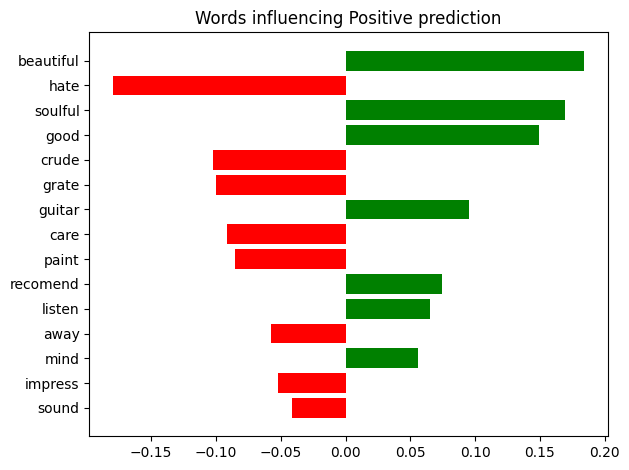


Top words influencing Positive prediction:
  beautiful: 0.1841
  hate: -0.1795
  soulful: 0.1692
  good: 0.1493
  crude: -0.1025
  grate: -0.1003
  guitar: 0.0950
  care: -0.0918
  paint: -0.0852
  recomend: 0.0747
  listen: 0.0649
  away: -0.0576
  mind: 0.0560
  impress: -0.0519
  sound: -0.0414

Explaining a NEGATIVE review:
Document: buyer beware self publish book want know read paragraph 5 star review write ms. haddon family friend...
True sentiment: Negative
Predicted sentiment: Negative

Explanation:
Available explanation classes: [1]


<Figure size 1000x600 with 0 Axes>

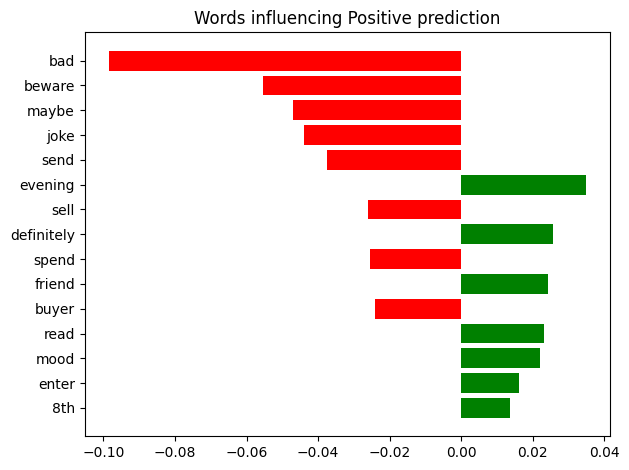


Top words influencing Positive prediction:
  bad: -0.0985
  beware: -0.0553
  maybe: -0.0469
  joke: -0.0440
  send: -0.0374
  evening: 0.0348
  sell: -0.0260
  definitely: 0.0257
  spend: -0.0255
  friend: 0.0242
  buyer: -0.0242
  read: 0.0232
  mood: 0.0221
  enter: 0.0160
  8th: 0.0137

Analyzing words influencing POSITIVE sentiment (aggregated):
Successfully aggregated 10 explanations
great: 0.4839
excellent: 0.4342
horrible: -0.3775
good: 0.3370
amaze: 0.2365
waste: -0.2329
woman: -0.2328
highly: 0.2202
life: 0.1950
pleased: 0.1934
exactly: 0.1779
today: 0.1724
terrible: -0.1676
time: 0.1645
buy: -0.1609

Analyzing words influencing NEGATIVE sentiment (aggregated):
Successfully aggregated 10 explanations
useless: -0.3540
bad: -0.2390
bible: 0.2370
return: -0.1869
trite: -0.1686
shock: -0.1602
leak: -0.1575
seriously: -0.1403
amazing: 0.1306
worth: 0.1270
read: 0.1185
year: 0.1115
dangerous: -0.1096
good: 0.1070
fall: -0.1053


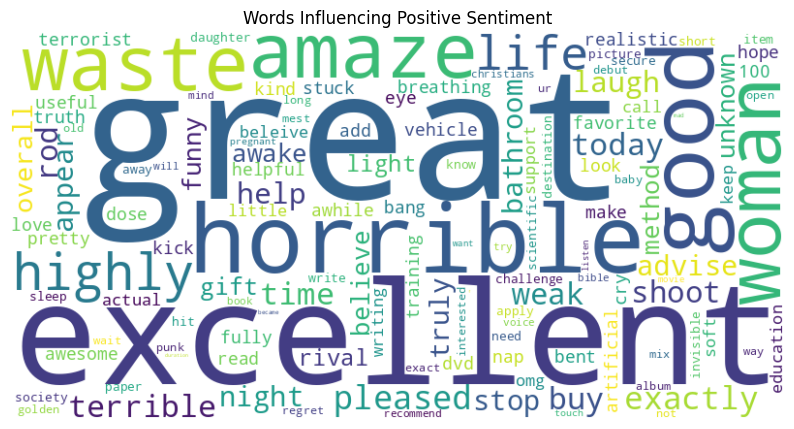

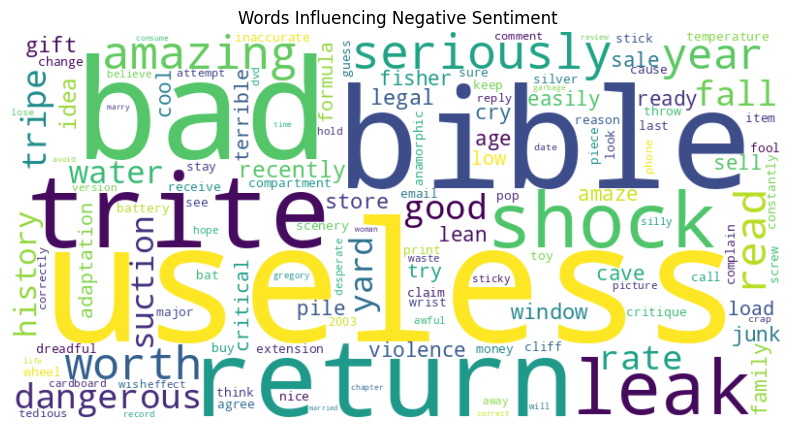

In [27]:
# Import necessary libraries
import lime
import lime.lime_text
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from wordcloud import WordCloud
import seaborn as sns

# First, use a simple Logistic Regression if you don't have a model already
classifier = LogisticRegression(max_iter=1000, C=10)
classifier.fit(X, train_labels)  # X is your TF-IDF matrix

# Create a pipeline
pipeline = make_pipeline(vectorizer, classifier)

# Initialize LIME text explainer
explainer = lime.lime_text.LimeTextExplainer(class_names=["Negative", "Positive"])

# Modified function to visualize LIME explanation for a single document
def visualize_lime_explanation(text_idx, num_features=10):
    text = train_texts[text_idx]
    true_label = train_labels[text_idx]

    # Generate explanation
    exp = explainer.explain_instance(
        text,
        pipeline.predict_proba,
        num_features=num_features
    )

    # Display basic information
    print(f"Document: {text[:100]}...")
    print(f"True sentiment: {'Positive' if true_label == 1 else 'Negative'}")
    print(f"Predicted sentiment: {'Positive' if pipeline.predict([text])[0] == 1 else 'Negative'}")
    print("\nExplanation:")

    # Safely get the available classes in the explanation
    available_labels = list(exp.local_exp.keys())
    print(f"Available explanation classes: {available_labels}")

    # Plot for available classes only
    for label in available_labels:
        class_name = "Positive" if label == 1 else "Negative"
        try:
            fig = plt.figure(figsize=(10, 6))
            exp.as_pyplot_figure(label=label)
            plt.title(f"Words influencing {class_name} prediction")
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error plotting for class {class_name}: {e}")

    # Show explanation as list for both classes
    for label in available_labels:
        class_name = "Positive" if label == 1 else "Negative"
        explanation_list = exp.as_list(label=label)
        print(f"\nTop words influencing {class_name} prediction:")
        for word, weight in explanation_list:
            print(f"  {word}: {weight:.4f}")

    return exp

# Find positive and negative examples
positive_indices = np.where(train_labels == 1)[0]
negative_indices = np.where(train_labels == 0)[0]

# Explain a positive review
print("Explaining a POSITIVE review:")
pos_exp = visualize_lime_explanation(positive_indices[0], num_features=15)

# Explain a negative review
print("\nExplaining a NEGATIVE review:")
neg_exp = visualize_lime_explanation(negative_indices[0], num_features=15)

# Modified function to aggregate explanations
def aggregate_lime_explanations(indices, target_label, num_features=15):
    word_importance = {}
    successful_explanations = 0

    for idx in indices:
        try:
            text = train_texts[idx]
            exp = explainer.explain_instance(
                text,
                pipeline.predict_proba,
                num_features=num_features
            )

            # Check if target label exists in explanation
            if target_label in exp.local_exp:
                for word, weight in exp.as_list(label=target_label):
                    if word in word_importance:
                        word_importance[word] += weight
                    else:
                        word_importance[word] = weight
                successful_explanations += 1
        except Exception as e:
            print(f"Error processing document {idx}: {e}")
            continue

    print(f"Successfully aggregated {successful_explanations} explanations")

    # Sort by absolute importance
    if word_importance:
        sorted_words = sorted(word_importance.items(), key=lambda x: abs(x[1]), reverse=True)
        return sorted_words
    else:
        return []

# Aggregate explanations for a smaller sample
print("\nAnalyzing words influencing POSITIVE sentiment (aggregated):")
pos_samples = np.random.choice(positive_indices, size=min(10, len(positive_indices)), replace=False)
pos_words = aggregate_lime_explanations(pos_samples, target_label=1)
for word, importance in pos_words[:15]:
    print(f"{word}: {importance:.4f}")

print("\nAnalyzing words influencing NEGATIVE sentiment (aggregated):")
neg_samples = np.random.choice(negative_indices, size=min(10, len(negative_indices)), replace=False)
neg_words = aggregate_lime_explanations(neg_samples, target_label=1)  # Still using label 1 but for negative examples
for word, importance in neg_words[:15]:
    print(f"{word}: {importance:.4f}")

# Create word clouds if we have aggregated words
if pos_words:
    # Create word cloud for positive
    pos_dict = {word: abs(imp) for word, imp in pos_words}
    pos_cloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(pos_dict)

    plt.figure(figsize=(10, 6))
    plt.imshow(pos_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Words Influencing Positive Sentiment")
    plt.show()

if neg_words:
    # Create word cloud for negative
    neg_dict = {word: abs(imp) for word, imp in neg_words}
    neg_cloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(neg_dict)

    plt.figure(figsize=(10, 6))
    plt.imshow(neg_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Words Influencing Negative Sentiment")
    plt.show()

In [ ]:
# SHAP Analysis
# Use a smaller subset for performance
sample_size = 200  # Adjust based on your computational resources
random_indices = np.random.choice(train_texts.shape[0] if hasattr(train_texts, 'shape') else len(train_texts), sample_size, replace=False)
X_sample = X[random_indices]
sample_labels = train_labels[random_indices]
sample_texts = [train_texts[i] for i in random_indices]

# Initialize SHAP explainer
explainer_shap = shap.KernelExplainer(
    model=classifier.predict_proba,
    data=X_sample,
    link="logit"
)

# Compute SHAP values for a smaller subset to save time
n_to_explain = 20  # Number of examples to explain with SHAP
explain_idx = np.random.choice(X_sample.shape[0], n_to_explain, replace=False)
X_to_explain = X_sample[explain_idx]

print("Computing SHAP values (this may take a few minutes)...")
shap_values = explainer_shap.shap_values(X_to_explain)
print("SHAP value computation complete.")

# Function to get feature names from indices
def get_feature_names(indices, vectorizer):
    feature_names = vectorizer.get_feature_names_out()
    return [feature_names[i] for i in indices]

# Visualize SHAP values for individual examples
def show_shap_explanation(doc_idx, class_idx=1):  # Default to positive class (1)
    # Get SHAP values for the document
    doc_shap_values = shap_values[class_idx][doc_idx]

    # Get feature names and values for non-zero features only
    X_sparse = X_to_explain[doc_idx]
    feature_indices = X_sparse.nonzero()[1]

    # Fix: Match indices to the correct SHAP values
    # For sparse matrices, SHAP values are likely in dense format
    # We need to ensure we're extracting the right values
    if len(doc_shap_values) == X_sparse.shape[1]:  # If SHAP values are for all features
        values = np.array([doc_shap_values[i] for i in feature_indices])
    else:  # If SHAP values are only for non-zero features
        values = doc_shap_values

    feature_names = get_feature_names(feature_indices, vectorizer)

    # Sort by absolute SHAP value
    sorted_idx = np.argsort(np.abs(values))[::-1]
    top_n = min(10, len(sorted_idx))  # Ensure we don't exceed array bounds
    top_idx = sorted_idx[:top_n]  # Show top 10 words (or fewer if not available)

    # Create DataFrame for visualization
    df = pd.DataFrame({
        'Feature': [feature_names[i] for i in top_idx],
        'SHAP Value': values[top_idx]
    })

    # Sort for display
    df = df.sort_values('SHAP Value')

    # Visualize
    plt.figure(figsize=(10, 6))
    colors = ['red' if x < 0 else 'green' for x in df['SHAP Value']]
    plt.barh(df['Feature'], df['SHAP Value'], color=colors)
    plt.xlabel('SHAP Value (impact on prediction)')
    plt.title(f"Words influencing {'positive' if class_idx == 1 else 'negative'} sentiment prediction")
    plt.tight_layout()
    plt.show()

    return df

# Show examples for both classes
print("\nSHAP explanation for example document #1:")
doc_idx = 0
show_shap_explanation(doc_idx, class_idx=1)  # Positive class

print("\nSHAP explanation for example document #2:")
doc_idx = 1
show_shap_explanation(doc_idx, class_idx=1)  # Positive class

# Compute global feature importance across all explained examples
def show_global_importance():
    # We focus on positive class (index 1)
    shap_values_pos = shap_values[1]

    # Get all non-zero feature indices
    feature_indices = []
    for i in range(X_to_explain.shape[0]):
        feature_indices.extend(X_to_explain[i].nonzero()[1])
    feature_indices = list(set(feature_indices))  # Unique indices

    # Calculate average absolute SHAP value per feature
    feature_importance = {}
    for idx in feature_indices:
        feature_name = vectorizer.get_feature_names_out()[idx]
        # Get SHAP values for this feature across all examples
        values = []
        for i in range(X_to_explain.shape[0]):
            x_sparse = X_to_explain[i]
            if idx in x_sparse.nonzero()[1]:
                # Make sure we handle the format correctly
                if len(shap_values_pos[i]) == x_sparse.shape[1]:  # Full feature set
                    values.append(shap_values_pos[i][idx])
                else:  # Sparse format
                    # Find position of this feature in the sparse representation
                    pos = np.where(x_sparse.nonzero()[1] == idx)[0]
                    if len(pos) > 0:
                        values.append(shap_values_pos[i][pos[0]])
        if values:
            feature_importance[feature_name] = np.mean(np.abs(values))

    # Sort by importance
    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    top_features = sorted_features[:20]

    # Create DataFrame for visualization
    df = pd.DataFrame(top_features, columns=['Feature', 'Importance'])

    # Visualize
    plt.figure(figsize=(10, 8))
    plt.barh(df['Feature'], df['Importance'])
    plt.xlabel('Mean |SHAP Value|')
    plt.title('Global Feature Importance')
    plt.tight_layout()
    plt.show()

    return df

# Show global feature importance
print("\nGlobal feature importance across documents:")
importance_df = show_global_importance()
print(importance_df)

Computing SHAP values (this may take a few minutes)...


  0%|          | 0/20 [00:00<?, ?it/s]